# Combined inference on Hong Kong and Hainan data of the Reproduction Number trajectory

## Load all information and modify them to the correct format

In [1]:
# Import libraries
import numpy as np
import math
import branchpro
import scipy.stats
import matplotlib
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import os
import pandas as pd
import datetime


/Users/ioaros/Desktop/Software Project/branchpro/branchpro/apps/_dash_app.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/Users/ioaros/Desktop/Software Project/branchpro/branchpro/apps/_simulation.py:15: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
# Read serial interval
si_file = 'si-epinow'
path = os.path.join('../data_library/serial_interval', '{}.csv'.format(si_file))
serial_interval = pd.read_csv(path, header=None)
serial_interval = serial_interval.fillna(0)
serial_intervals = serial_interval.values.T

In [3]:
# Read Hong Kong data
path = os.path.join('../data_library/covid_hong_kong/HK.csv')
data_HK = pd.read_csv(path)[:51]

# Read Hainan data
path = os.path.join('../data_library/covid_hainan/HN.csv')
data_HN = pd.read_csv(path)[:31]

## Hong Kong Inference

In [4]:
time_key = 'Time'
num_timepoints = max(data_HK[time_key])
data_times = data_HK[time_key]

# Pad with zeros the time points where we have no information on
# the number of incidences
padded_inc_data = data_HK.set_index(time_key).reindex(
    range(
        1, max(data_times)+1)
        ).fillna(0).reset_index()
locally_infected_cases_HK = padded_inc_data['Incidence Number']
imported_cases_HK = padded_inc_data['Imported Cases']

start_times = np.arange(1, num_timepoints+1, dtype=int)
times = np.arange(num_timepoints+1)

In [5]:
# Same inference, but using the LocImpBranchProPosterior
tau = 6
R_t_start = tau+1
a = 1
b = 0.2

# Run inferences for different values of epsilon
column_names = ['Time Points', 'Mean', 'Lower bound CI', 'Upper bound CI', 'Central Probability', 'Epsilon']
epsilon_range_HK = [0.200, 1]
chosen_times = [10, 15, 20, 25, 30, 40]

all_intervals = pd.DataFrame(columns=column_names)
all_intervals_chosen = pd.DataFrame(columns=column_names)
# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': locally_infected_cases_HK
    }
)

imported_inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': imported_cases_HK
    }
)

for epsilon in epsilon_range_HK:
    inference = branchpro.LocImpBranchProPosteriorMultSI(
        inc_data=inc_data,
        imported_inc_data=imported_inc_data,
        epsilon=epsilon,
        daily_serial_intervals=serial_intervals,
        alpha=a,
        beta=b)

    inference.run_inference(tau=tau)
    intervals = inference.get_intervals(central_prob=0)
    intervals = intervals.append(inference.get_intervals(central_prob=.25))
    intervals = intervals.append(inference.get_intervals(central_prob=.95))
    temp = inference.get_intervals(central_prob=.95)

    intervals['Epsilon'] = [epsilon] * len(intervals.index)

    intervals_chosen = pd.DataFrame(columns=intervals.columns)
    for time_pt in chosen_times:
        intervals_chosen = intervals_chosen.append(
            intervals.loc[intervals['Time Points']== time_pt])

    all_intervals = all_intervals.append(intervals)
    all_intervals_chosen = all_intervals_chosen.append(intervals_chosen)

all_intervals_HK = all_intervals[all_intervals['Central Probability']==0.95]

/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/4156689192.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals = intervals.append(inference.get_intervals(central_prob=.25))
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/4156689192.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals = intervals.append(inference.get_intervals(central_prob=.95))
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/4156689192.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals_chosen = intervals_chosen.append(
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/4156689192.py:48: FutureWarning: The frame.append method is deprecated and will be removed fr

In [6]:
inference_times = sorted(list(set(all_intervals_HK['Time Points'].tolist())))

## Hainan Inference

In [7]:
time_key = 'Time'
num_timepoints = max(data_HN[time_key])
data_times = data_HN[time_key]

# Pad with zeros the time points where we have no information on
# the number of incidences
padded_inc_data = data_HN.set_index(time_key).reindex(
    range(
        1, max(data_times)+1)
        ).fillna(0).reset_index()
locally_infected_cases_HN = padded_inc_data['Incidence Number']
imported_cases_HN = padded_inc_data['Imported Cases']

start_times = np.arange(1, num_timepoints+1, dtype=int)
times = np.arange(num_timepoints+1)

In [8]:
# Same inference, but using the LocImpBranchProPosterior
tau = 6
R_t_start = tau+1
a = 1
b = 0.2

# Run inferences for different values of epsilon
column_names = ['Time Points', 'Mean', 'Lower bound CI', 'Upper bound CI', 'Central Probability', 'Epsilon']
epsilon_range_HN = [0.785, 1]
chosen_times = [10, 15, 20, 25, 30, 40]

all_intervals = pd.DataFrame(columns=column_names)
all_intervals_chosen = pd.DataFrame(columns=column_names)
# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': locally_infected_cases_HN
    }
)

imported_inc_data = pd.DataFrame(
    {
        'Time': start_times,
        'Incidence Number': imported_cases_HN
    }
)

for epsilon in epsilon_range_HN:
    inference = branchpro.LocImpBranchProPosteriorMultSI(
        inc_data=inc_data,
        imported_inc_data=imported_inc_data,
        epsilon=epsilon,
        daily_serial_intervals=serial_intervals,
        alpha=a,
        beta=b)

    inference.run_inference(tau=tau)
    intervals = inference.get_intervals(central_prob=0)
    intervals = intervals.append(inference.get_intervals(central_prob=.25))
    intervals = intervals.append(inference.get_intervals(central_prob=.95))
    temp = inference.get_intervals(central_prob=.95)

    intervals['Epsilon'] = [epsilon] * len(intervals.index)

    intervals_chosen = pd.DataFrame(columns=intervals.columns)
    for time_pt in chosen_times:
        intervals_chosen = intervals_chosen.append(
            intervals.loc[intervals['Time Points']== time_pt])

    all_intervals = all_intervals.append(intervals)
    all_intervals_chosen = all_intervals_chosen.append(intervals_chosen)

all_intervals_HN = all_intervals[all_intervals['Central Probability']==0.95]

/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/1356538081.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals = intervals.append(inference.get_intervals(central_prob=.25))
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/1356538081.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals = intervals.append(inference.get_intervals(central_prob=.95))
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/1356538081.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  intervals_chosen = intervals_chosen.append(
/var/folders/ph/jyxnc9y52svgq2k5lt2q4r000000gp/T/ipykernel_83507/1356538081.py:48: FutureWarning: The frame.append method is deprecated and will be removed fr

In [9]:
inference_times = sorted(list(set(all_intervals_HN['Time Points'].tolist())))

/Users/ioaros/Desktop/Software Project/branchpro/branchpro/figures.py:495: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_results[col] = pd.to_numeric(default_results[col])
/Users/ioaros/Desktop/Software Project/branchpro/branchpro/figures.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[col] = pd.to_numeric(results[col])
/Users/ioaros/Desktop/Software Project/branchpro/branchpro/figures.py:495: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

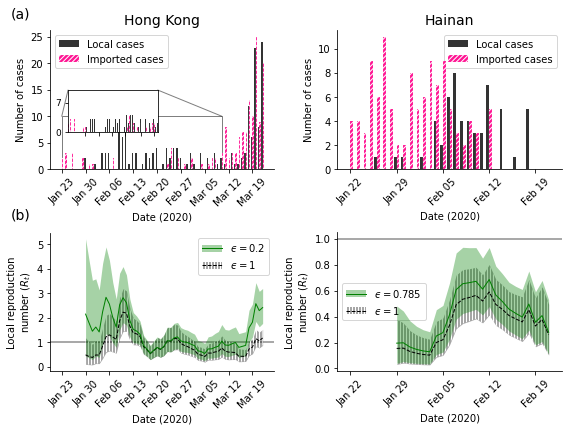

In [10]:
fig = branchpro.figures.plot_regions_inference(
    [datetime.datetime(2020, 1, 23), datetime.datetime(2020, 1, 22)],
    ['Hong Kong', 'Hainan'],
    [locally_infected_cases_HK, locally_infected_cases_HN],
    [imported_cases_HK, imported_cases_HN],
    [datetime.datetime(2020, 1, 23) + datetime.timedelta(days=inference_times[0]-1),
     datetime.datetime(2020, 1, 22) + datetime.timedelta(days=inference_times[0]-1)],
    [list(epsilon_range_HK), list(epsilon_range_HN)],
    [[all_intervals_HK.loc[all_intervals_HK['Epsilon']==eps] for eps in epsilon_range_HK],
    [all_intervals_HN.loc[all_intervals_HN['Epsilon']==eps] for eps in epsilon_range_HN]],
    default_epsilon=1,
    inset_region=['Hong Kong'],
    show=False,
    hkhn=True)

plt.savefig('HK_HN_inference.pdf')

In [11]:
inference_times = sorted(list(set(all_intervals_HK['Time Points'].tolist())))
dates = []

for time in inference_times:
    if (all_intervals_HK.loc[(all_intervals_HK['Epsilon']==0.2) & (all_intervals_HK['Time Points']==time)]['Mean'] > 1).item() and (all_intervals_HK.loc[(all_intervals_HK['Epsilon']==1) & (all_intervals_HK['Time Points']==time)]['Mean'] < 1).item():
        print(datetime.datetime(2020, 1, 22) + datetime.timedelta(days=time-1))
        dates.append(datetime.datetime(2020, 1, 22) + datetime.timedelta(days=time-1))

2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-03-09 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
